In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

# Histogram of Grayscale Image

In [ ]:
I = io.imread("/content/sample_1.png")
print(I.shape)

(288, 384)


/tmp/ipython-input-1371413534.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


(np.float64(-0.5), np.float64(383.5), np.float64(287.5), np.float64(-0.5))

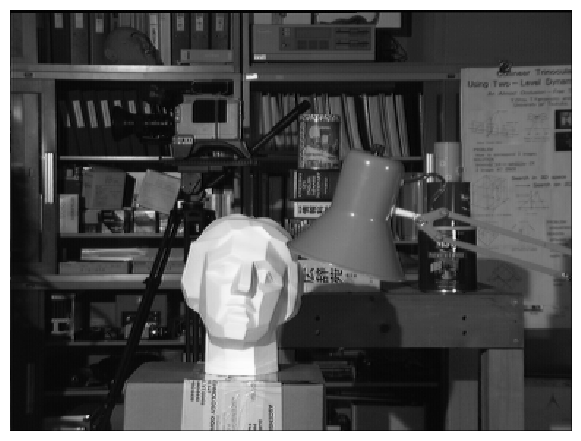

In [ ]:
io.imshow(I)
plt.axis("off")

In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.ylabel("percentage")

In [ ]:
def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")

    plt.subplot(2, 1, 2)
    plot_hist(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

/tmp/ipython-input-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


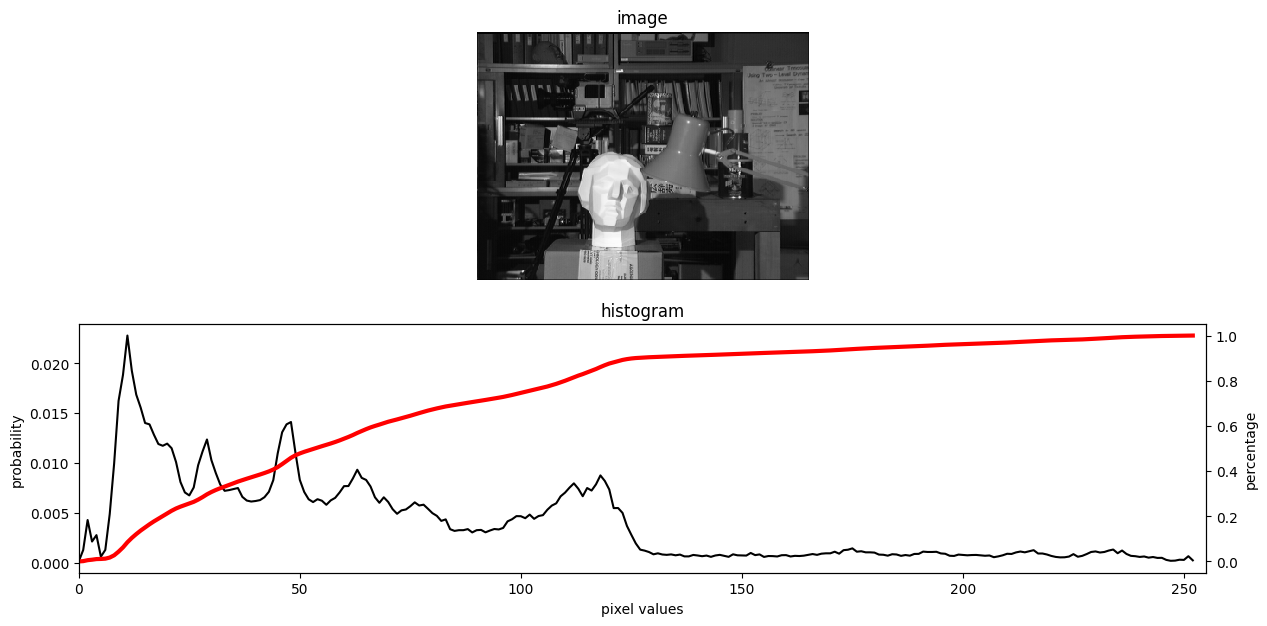

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I, normalize=True)
plt.show()

# Histogram of Color Image

In [ ]:
I = io.imread("/content/sample_2.jpg")
print(I.shape)

(360, 506, 3)


/tmp/ipython-input-57-1371413534.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


(np.float64(-0.5), np.float64(505.5), np.float64(359.5), np.float64(-0.5))

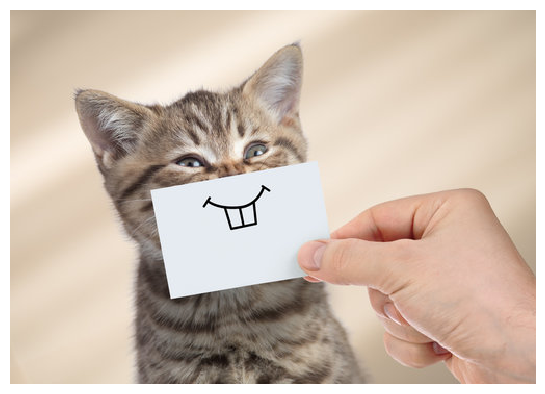

In [ ]:
io.imshow(I)
plt.axis("off")

In [ ]:
def plot_hist_color(I, nbins=256, normalize=False):
    color=['r', 'g', 'b']
    plt.figure(figsize=(8,5))
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])

    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

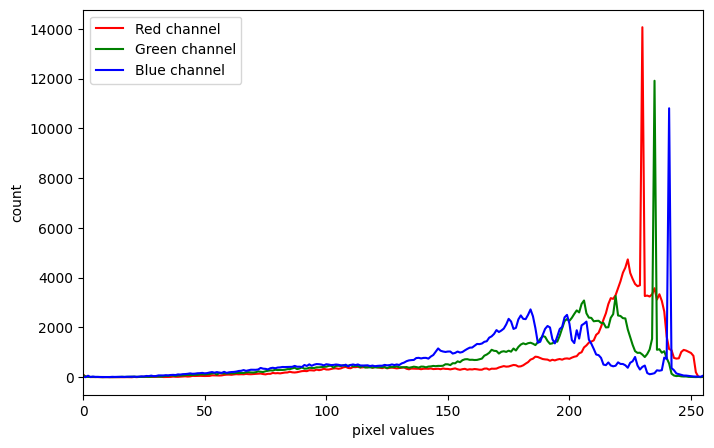

In [ ]:
plot_hist_color(I)
plt.show()

Text(0.5, 1.0, 'Blue')

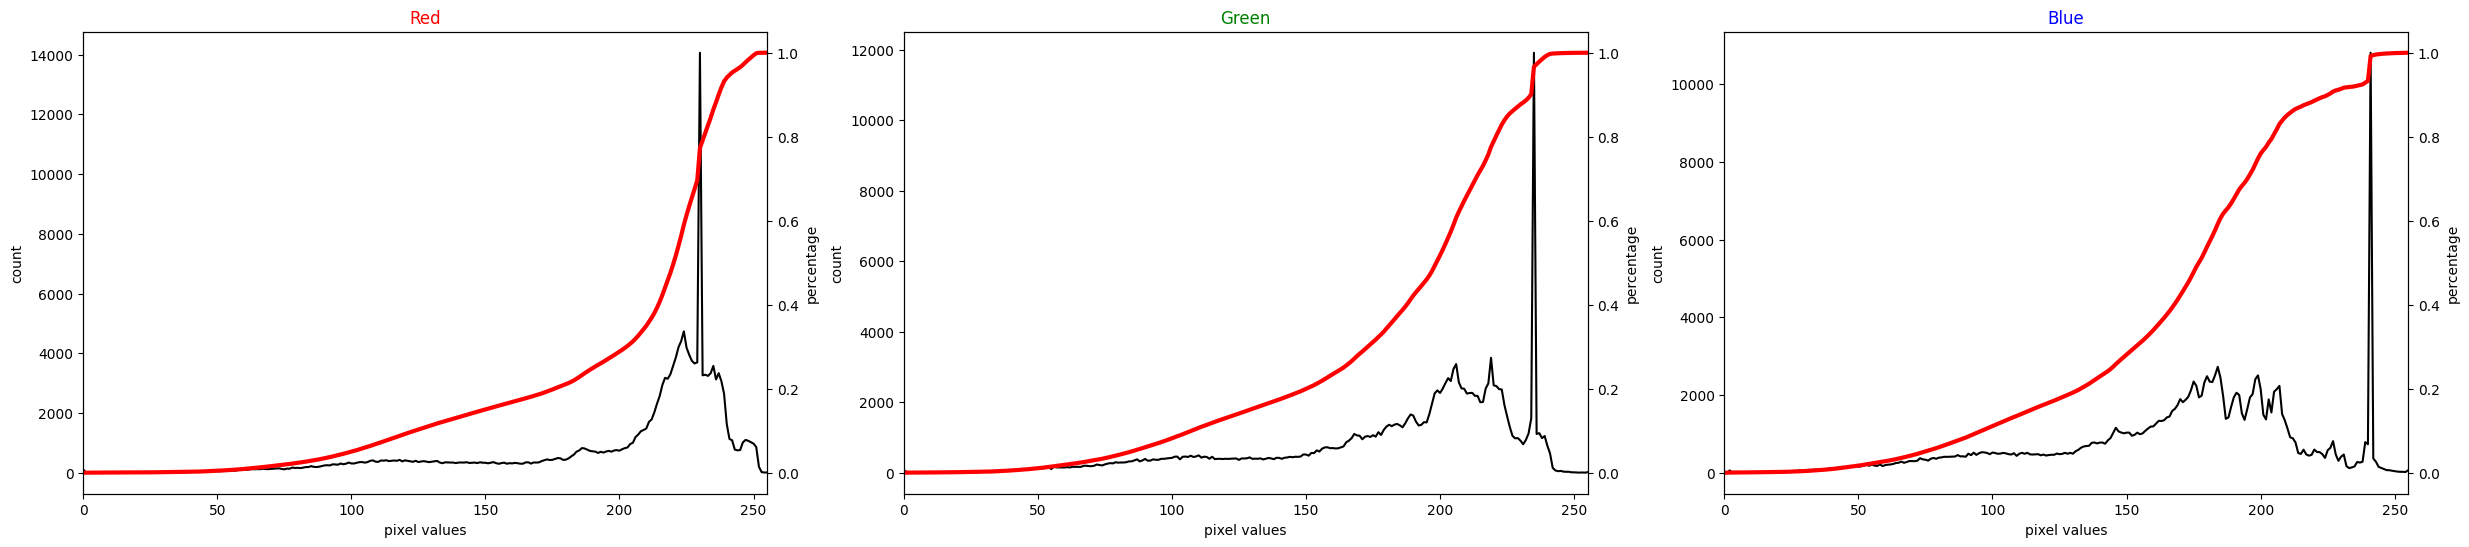

In [ ]:
plt.rcParams['figure.figsize'] = (30, 6)
plt.subplot(1, 3, 1)
plot_hist(I[:, :, 0], plot_cdf=True)
plt.title("Red", color="red")

plt.subplot(1, 3, 2)
plot_hist(I[:, :, 1], plot_cdf=True)
plt.title("Green", color="green")

plt.subplot(1, 3, 3)
plot_hist(I[:, :, 2], plot_cdf=True)
plt.title("Blue", color="blue")

# Histogram Equalization (Grayscale)

In [ ]:
I = io.imread("/content/sample_1.png")
I = I/255
print(I.shape)

(288, 384)


/tmp/ipython-input-2226826253.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


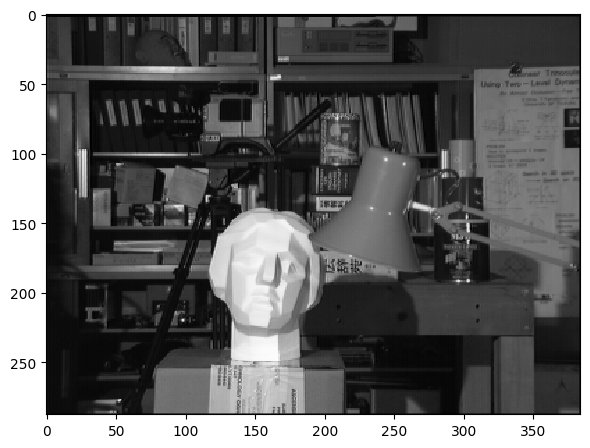

In [ ]:
io.imshow(I)

In [ ]:
Ieq = exposure.equalize_hist(I)

/tmp/ipython-input-1055041051.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq)


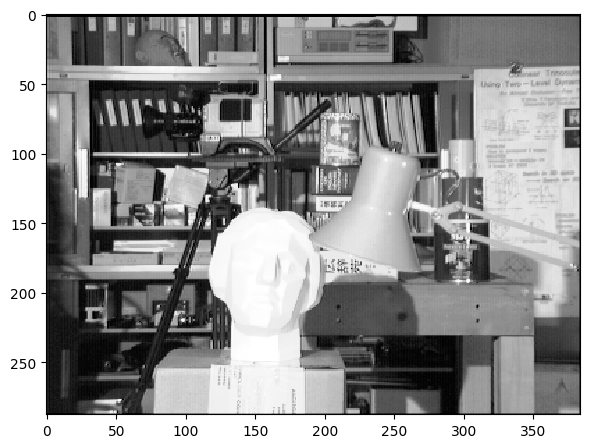

In [ ]:
io.imshow(Ieq)

/tmp/ipython-input-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


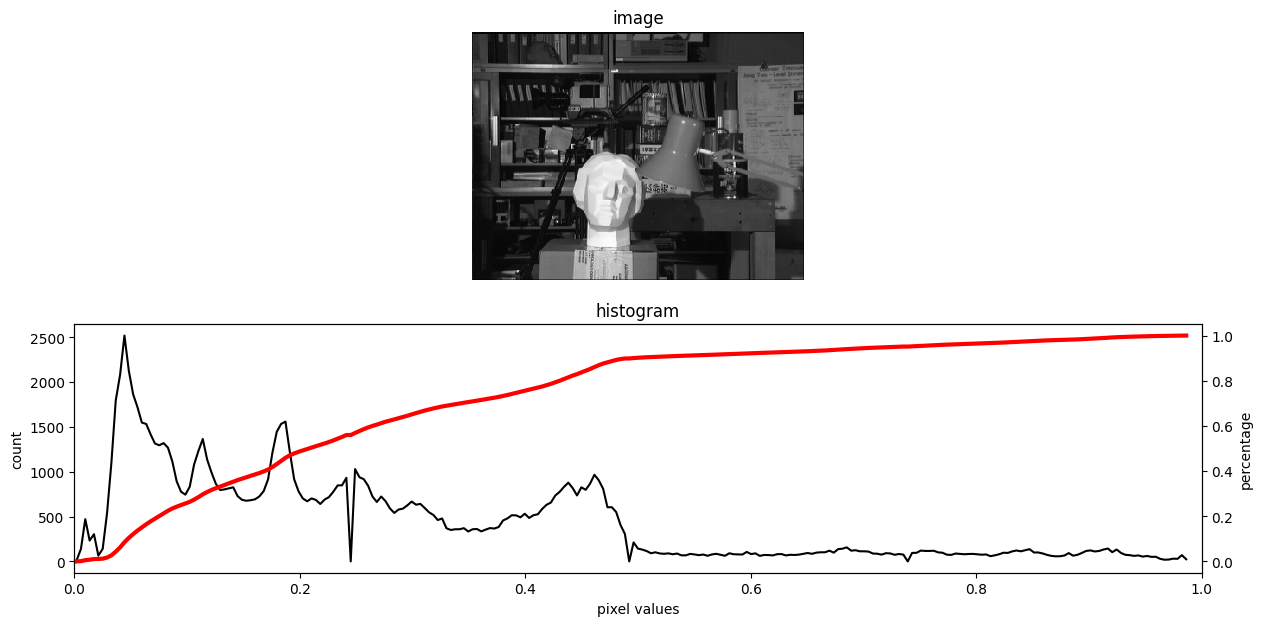

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)

/tmp/ipython-input-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


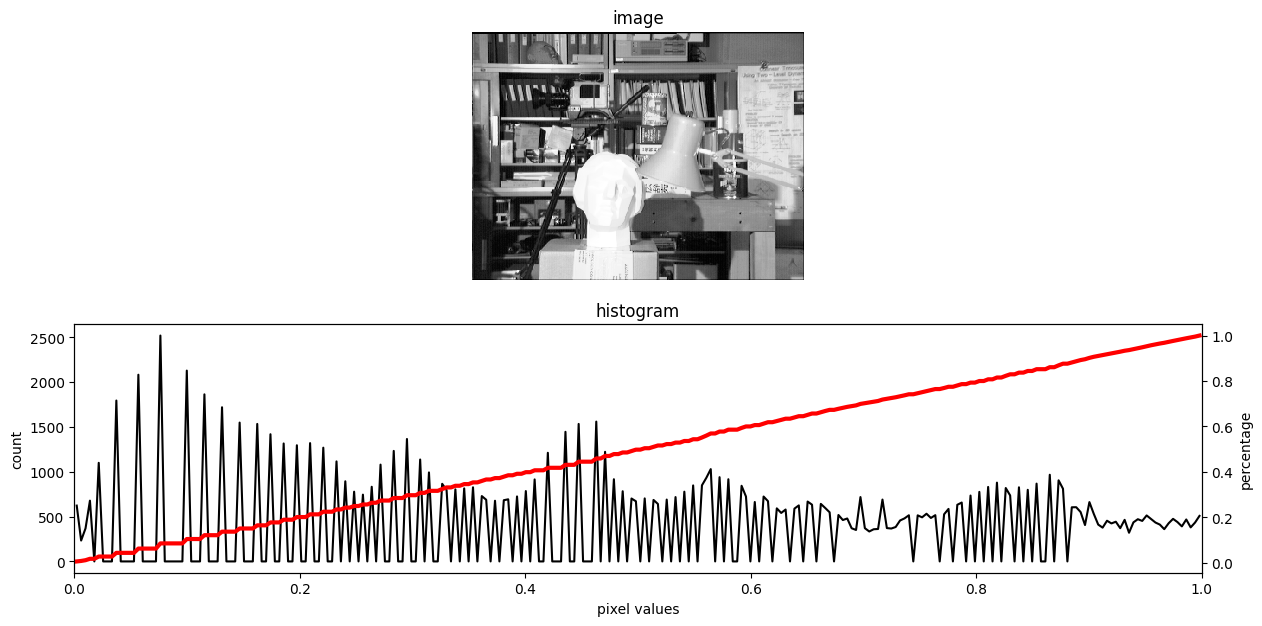

In [ ]:
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(Ieq)

/tmp/ipython-input-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


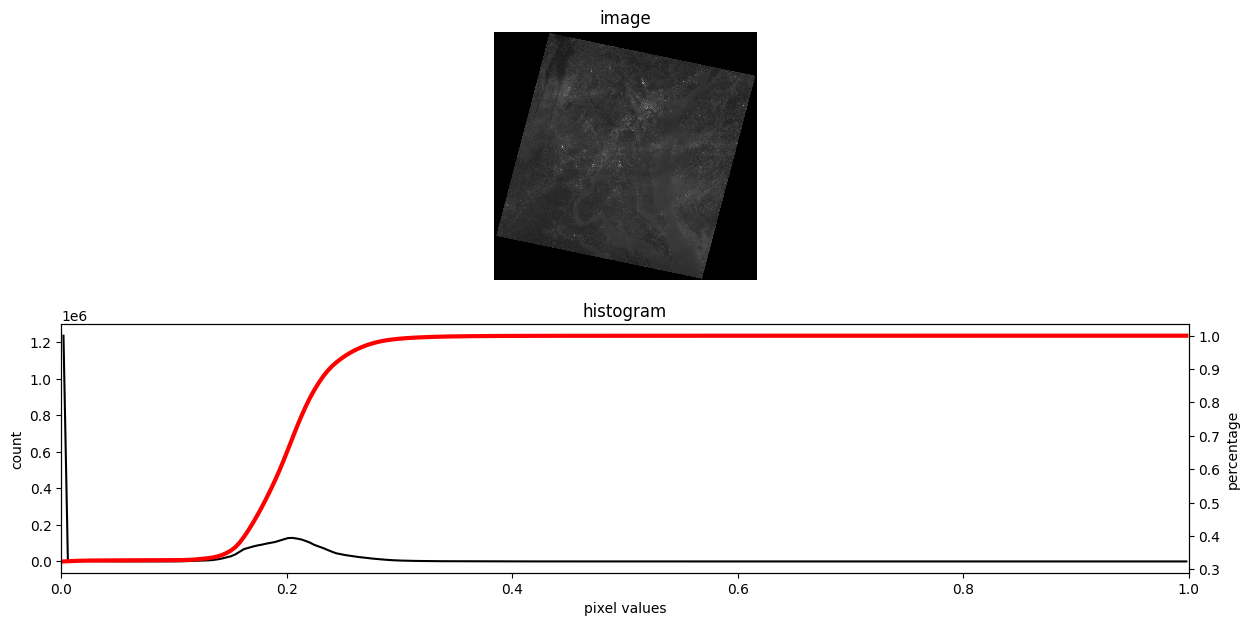

In [ ]:
I = io.imread("/content/sample_3.jpeg")
I = I/255
plot_img_and_hist(I, plot_cdf=True)

/tmp/ipython-input-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


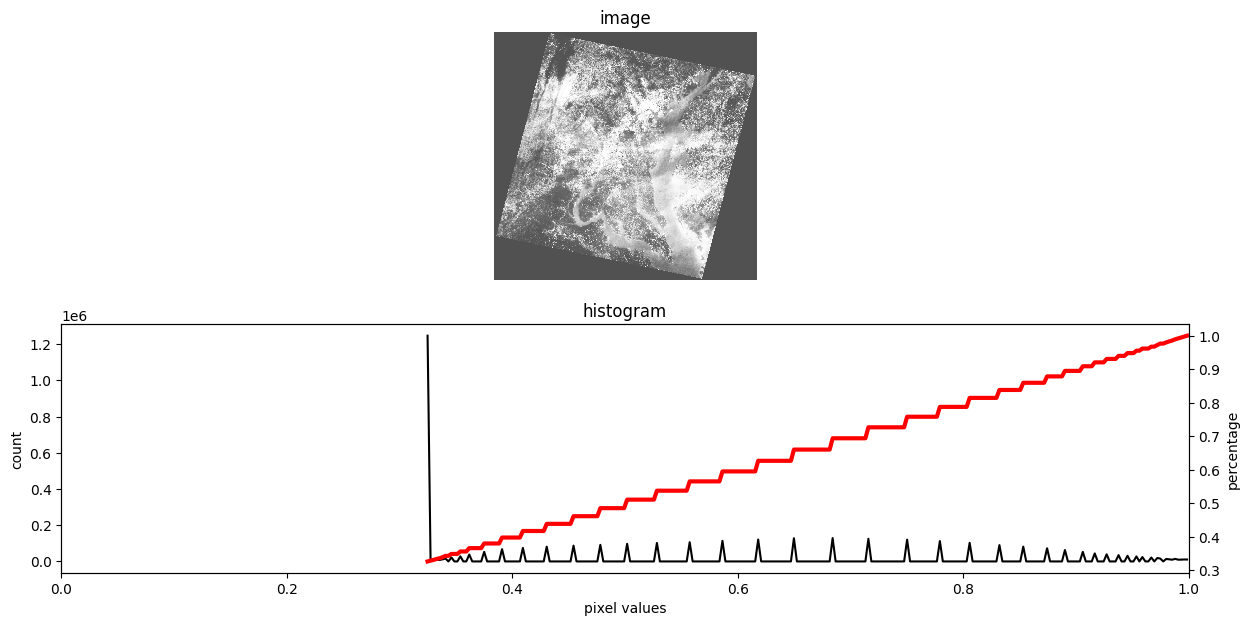

In [ ]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

/tmp/ipython-input-1055041051.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq)


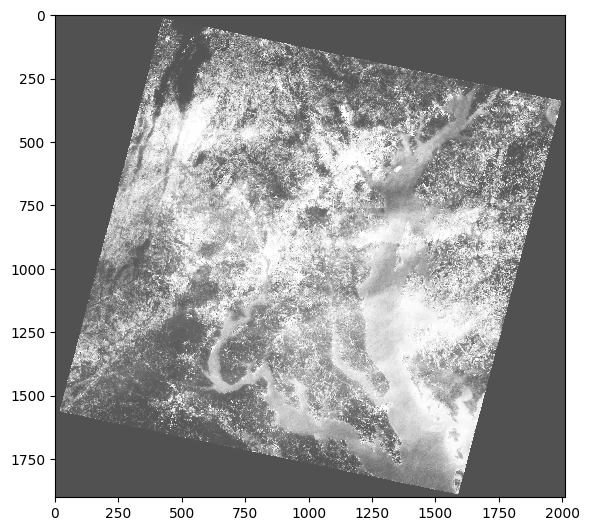

In [ ]:
io.imshow(Ieq)

# Histogram Equalization (Color)

In [ ]:
I = io.imread("/content/sample_2.jpg")
I = I/255

In [ ]:
Ieq = I.copy()
Ieq[:, :, 0] = exposure.equalize_hist(I[:, :, 0])
Ieq[:, :, 1] = exposure.equalize_hist(I[:, :, 1])
Ieq[:, :, 2] = exposure.equalize_hist(I[:, :, 2])

/tmp/ipython-input-71-2226826253.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


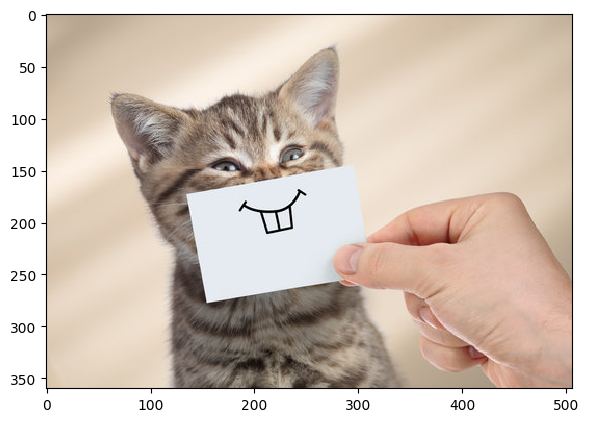

In [ ]:
io.imshow(I)

/tmp/ipython-input-72-1055041051.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq)


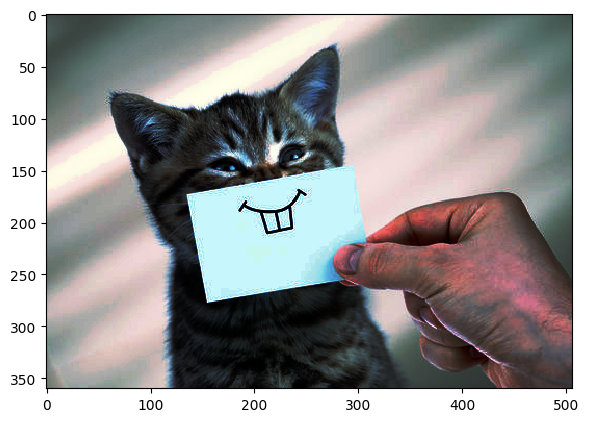

In [ ]:
io.imshow(Ieq)

In [ ]:
Ilab = color.rgb2lab(I)

In [ ]:
print(I.shape)
print(Ilab.shape)

(360, 506, 3)
(360, 506, 3)


/tmp/ipython-input-75-2226826253.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


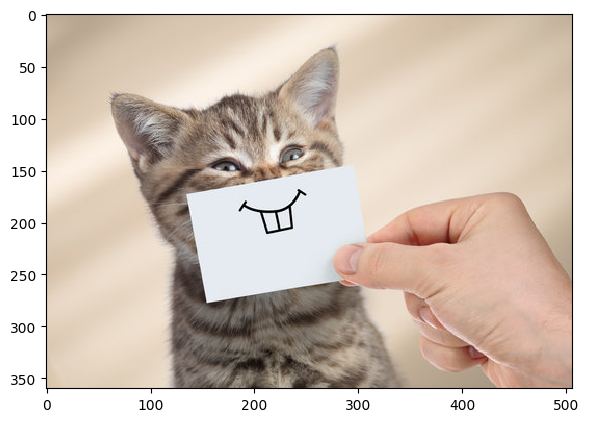

In [ ]:
io.imshow(I)

/tmp/ipython-input-76-81969874.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ilab)


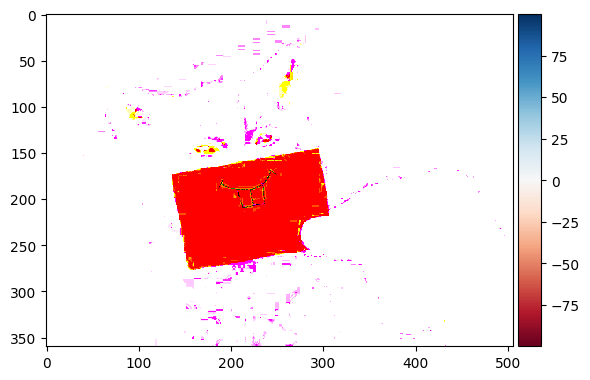

In [ ]:
io.imshow(Ilab)

In [ ]:
print(Ilab[:, :, 2].min())
print(Ilab[:, :, 2].max())

-15.67263160982404
33.25520001574536


/tmp/ipython-input-78-1044076396.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ilab[:, :, 0]/100, cmap = 'grey')


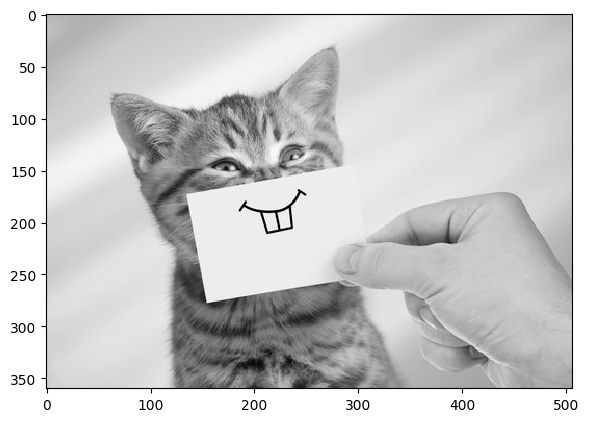

In [ ]:
io.imshow(Ilab[:, :, 0]/100, cmap = 'grey')

In [ ]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

In [ ]:
Ieq = exposure.equalize_hist(Ilab[:, :, 0])

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


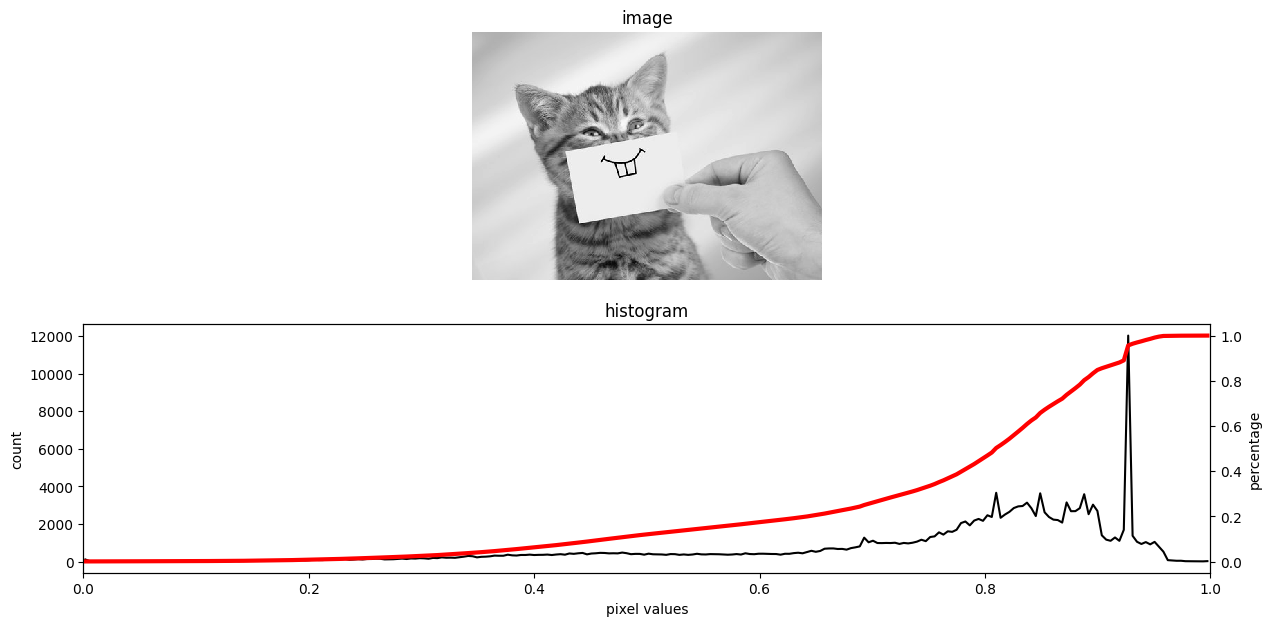

In [ ]:
plot_img_and_hist(Ilab[:, :, 0])

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


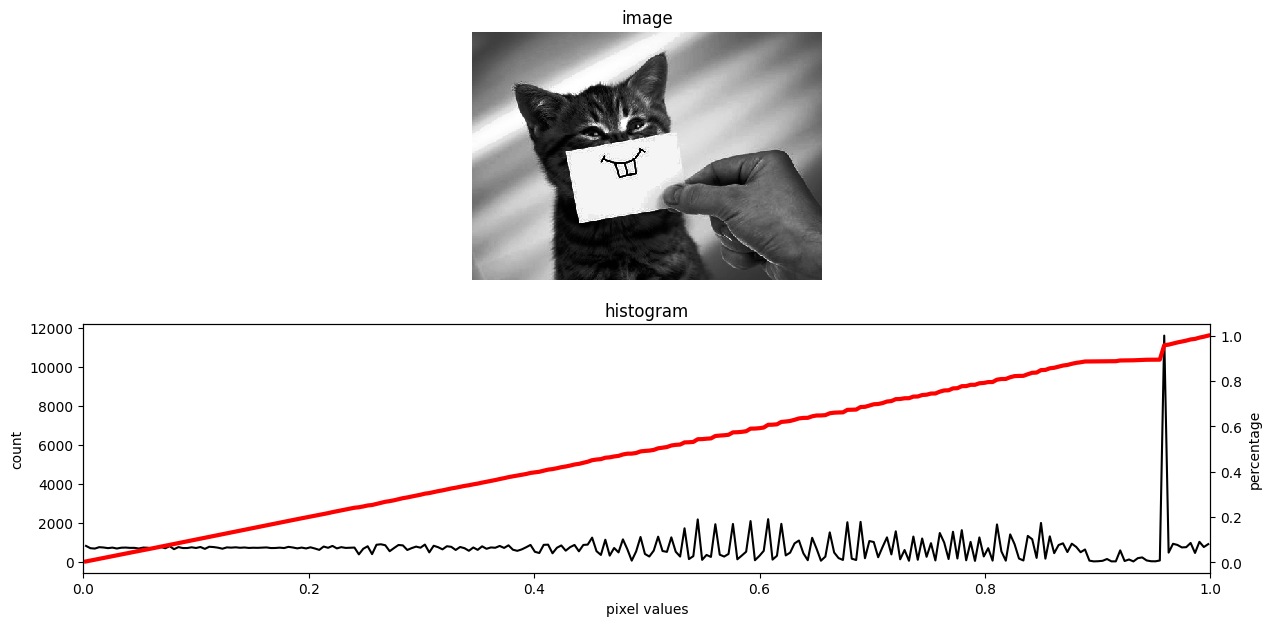

In [ ]:
plot_img_and_hist(Ieq)

# Degrading Image

In [ ]:
I = io.imread("/content/sample_1.png")
I = I/255

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


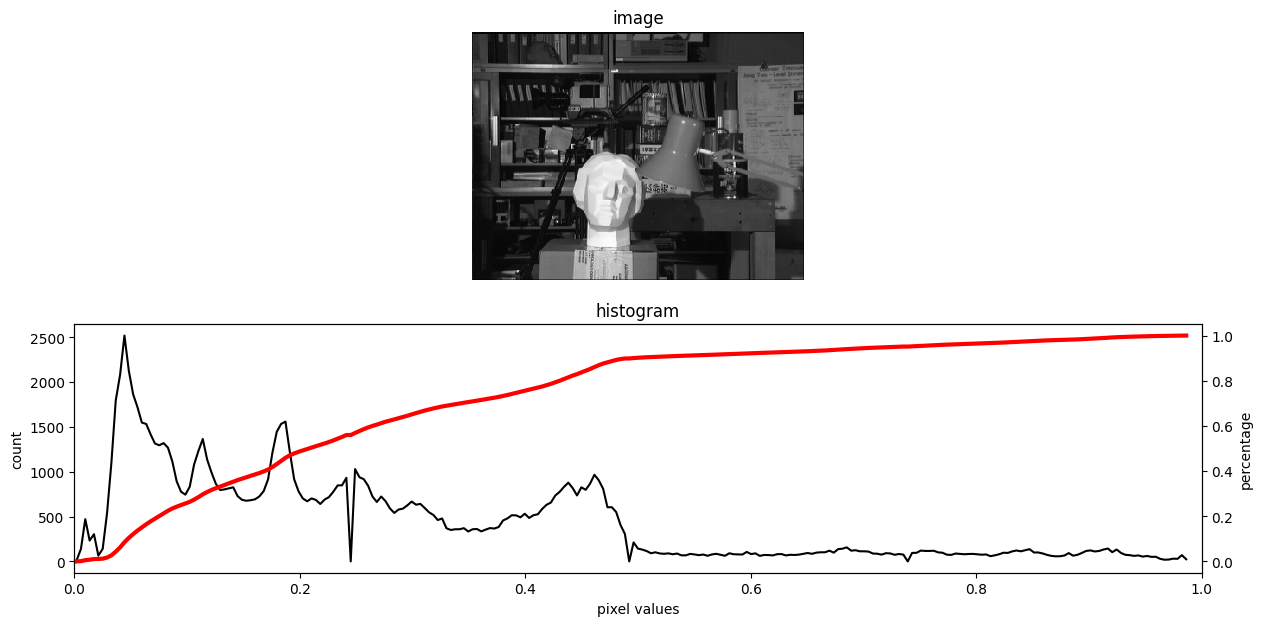

In [ ]:
plot_img_and_hist(I)

In [ ]:
Idegraded = exposure.rescale_intensity(I, in_range=(0, 1), out_range=(0.6, 0.8))

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


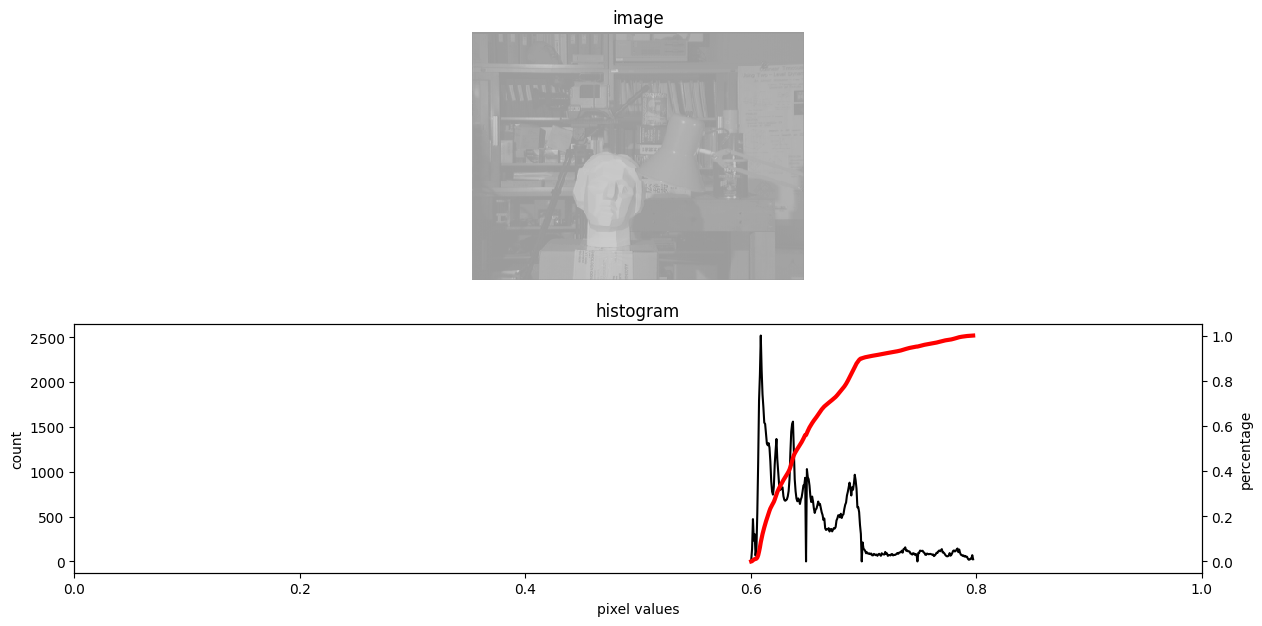

In [ ]:
plot_img_and_hist(Idegraded)

In [ ]:
Ieq_degraded = exposure.equalize_hist(Idegraded)

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


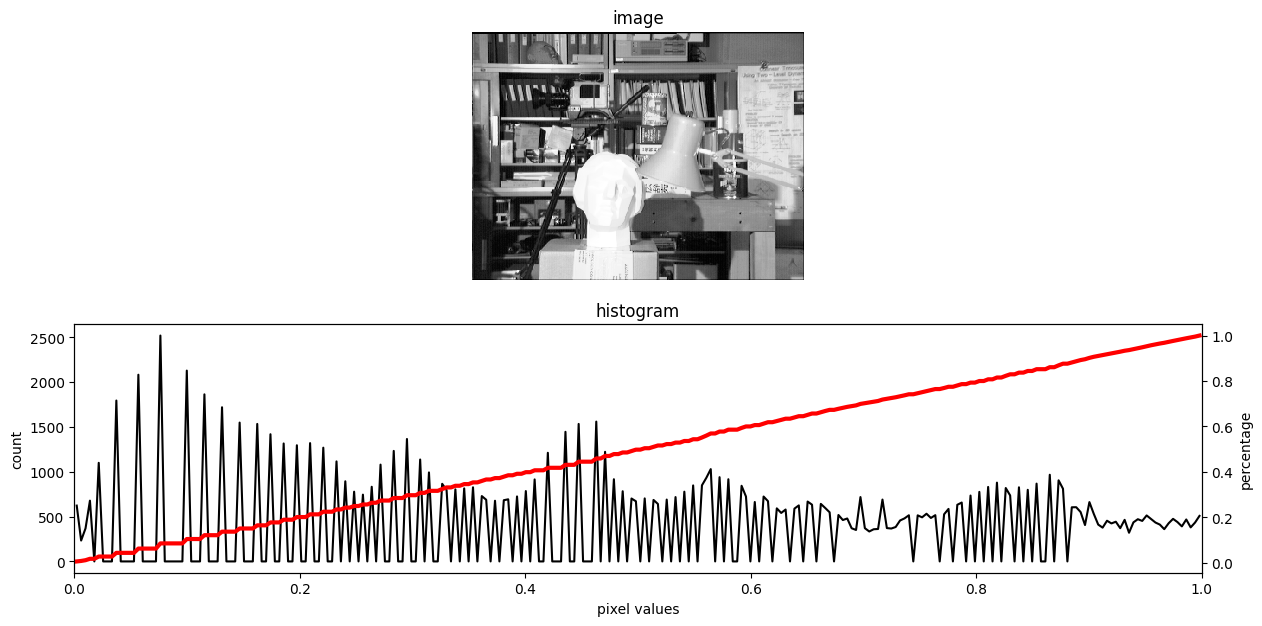

In [ ]:
plot_img_and_hist(Ieq_degraded)

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


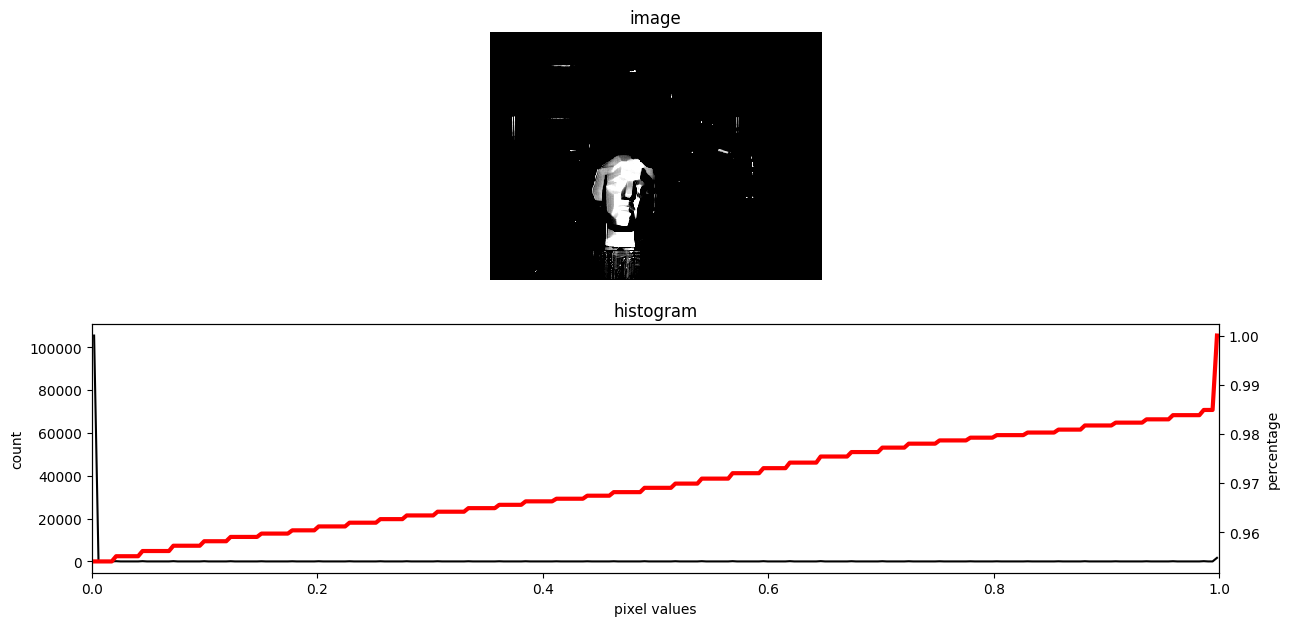

In [ ]:
Idegraded = exposure.rescale_intensity(I, in_range=(0.75, 0.9), out_range=(0, 1))
plot_img_and_hist(Idegraded)

# Degrading color image

In [ ]:
I = io.imread("/content/sample_2.jpg")
I = I/255

In [ ]:
Ilab = color.rgb2lab(I)

In [ ]:
Ilab[:, :, 0] = Ilab[:, :, 0]/100

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


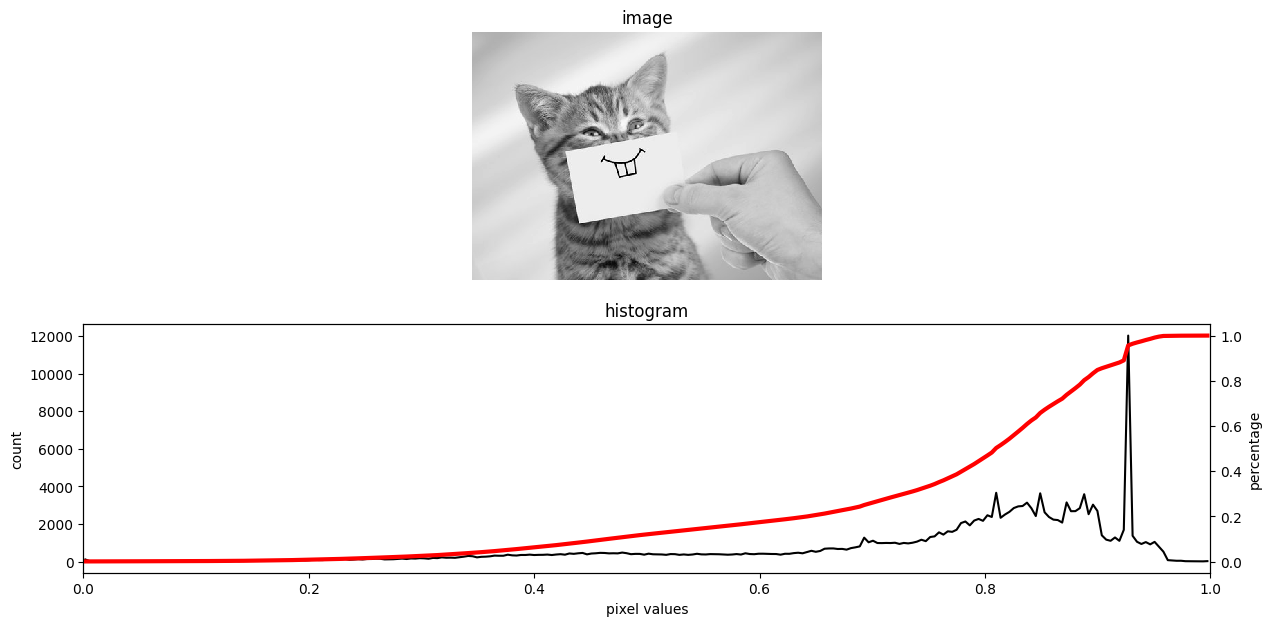

In [ ]:
plot_img_and_hist(Ilab[:, :, 0])

In [ ]:
Idegraded_l = exposure.rescale_intensity(Ilab[:, :, 0], in_range=(0, 1), out_range=(0.4, 0.6))

In [ ]:
Ilab[:, :, 0] = Idegraded_l*100

In [ ]:
Idegraded = color.lab2rgb(Ilab)

/tmp/ipython-input-102-3189329455.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Idegraded)


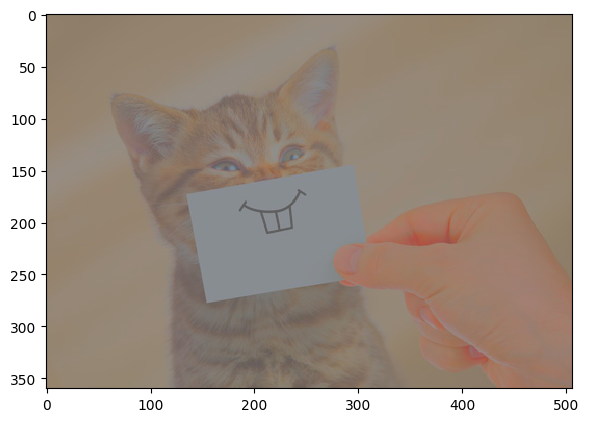

In [ ]:
io.imshow(Idegraded)

/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)
/tmp/ipython-input-99-2572759415.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(Ieq_degraded)


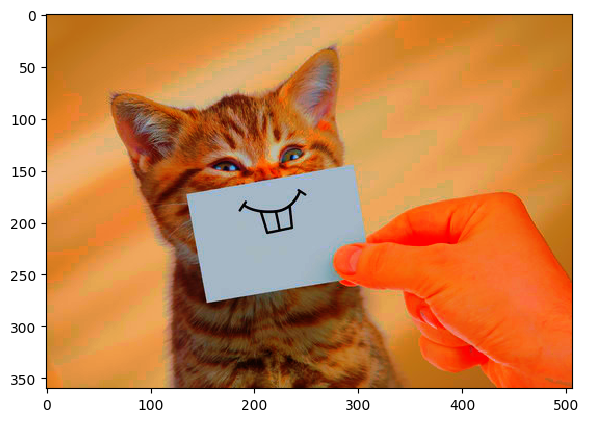

In [ ]:
Ieq_degraded = exposure.equalize_hist(Idegraded)
io.imshow(Ieq_degraded)

# Adaptive Histogram Equalization

In [ ]:
I = io.imread("/content/sample_1.png")
I = I/255

In [ ]:
I_adapt_eq = exposure.equalize_adapthist(I, kernel_size=(32, 32), clip_limit=0)

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


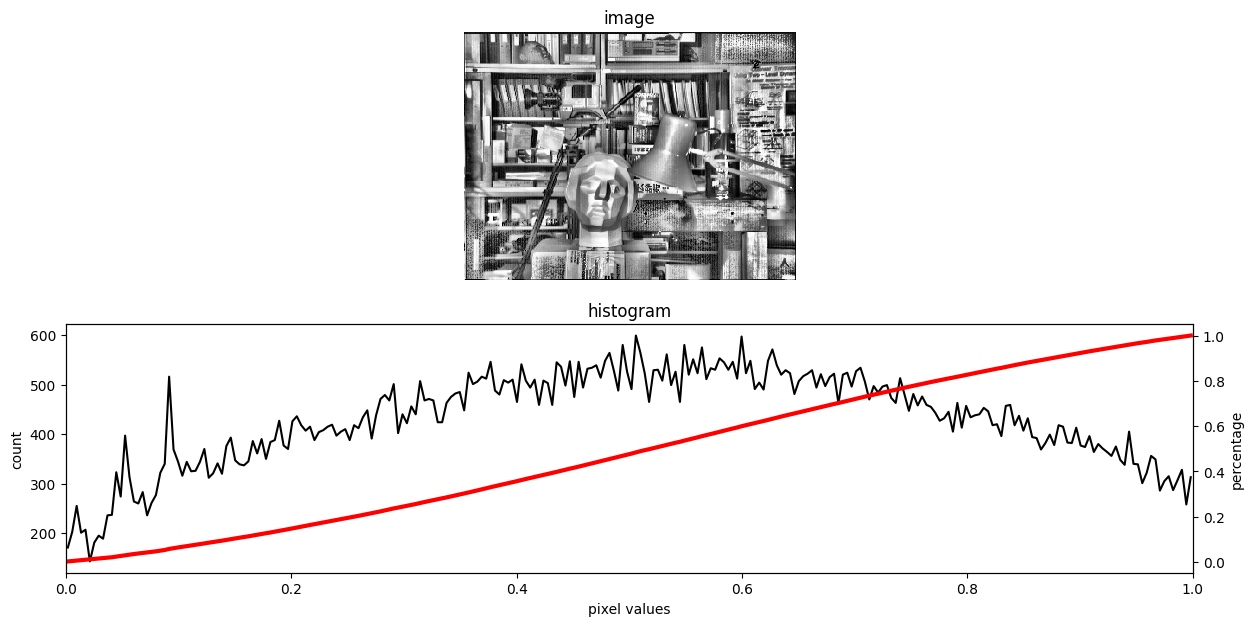

In [ ]:
plot_img_and_hist(I_adapt_eq)

/tmp/ipython-input-109-286110763.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_adapt_eq)


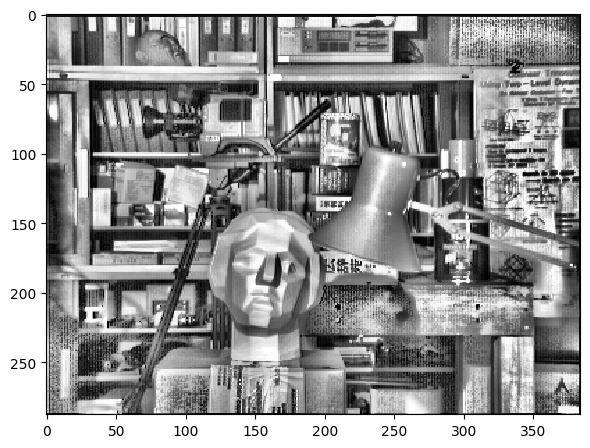

In [ ]:
io.imshow(I_adapt_eq)

In [ ]:
I = io.imread("/content/sample_2.jpg")
I = I/255
I = color.rgb2gray(I)

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


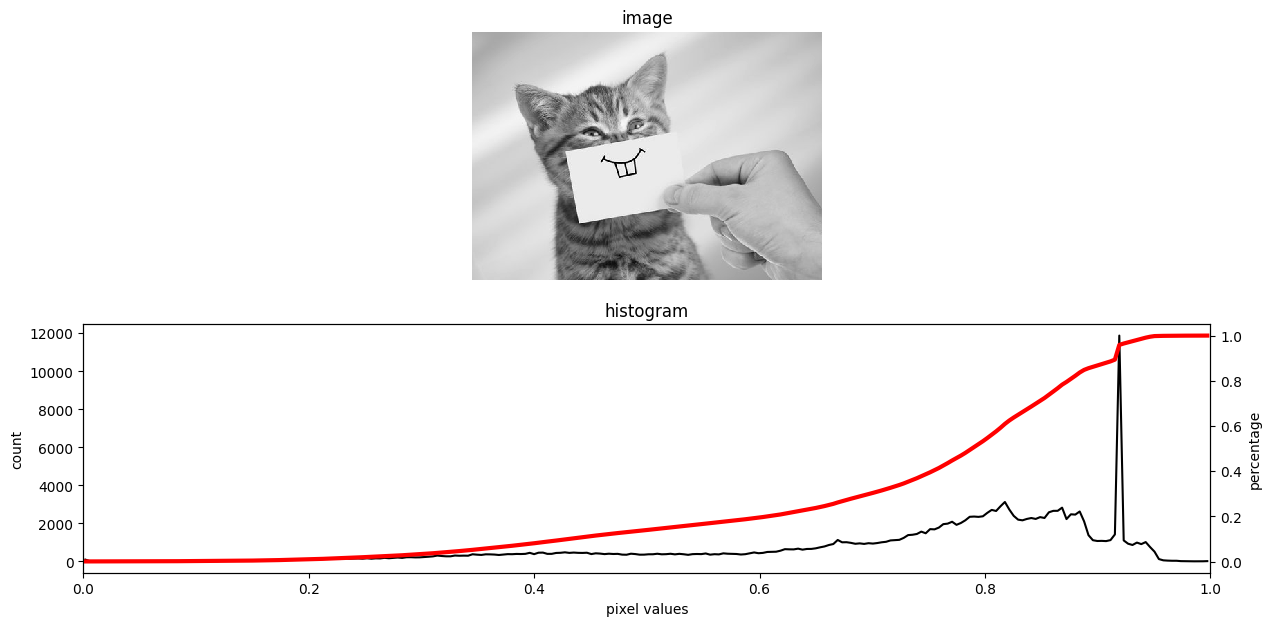

In [ ]:
plot_img_and_hist(I)

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


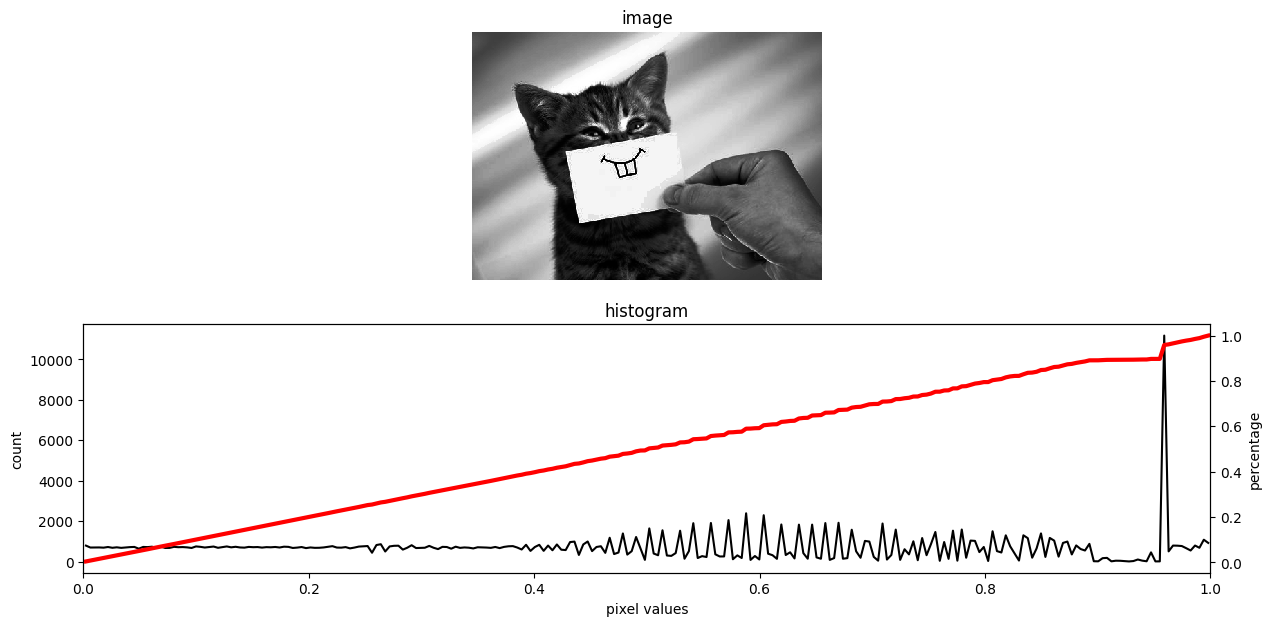

In [ ]:
Ieq = exposure.equalize_hist(I)
plot_img_and_hist(Ieq)

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


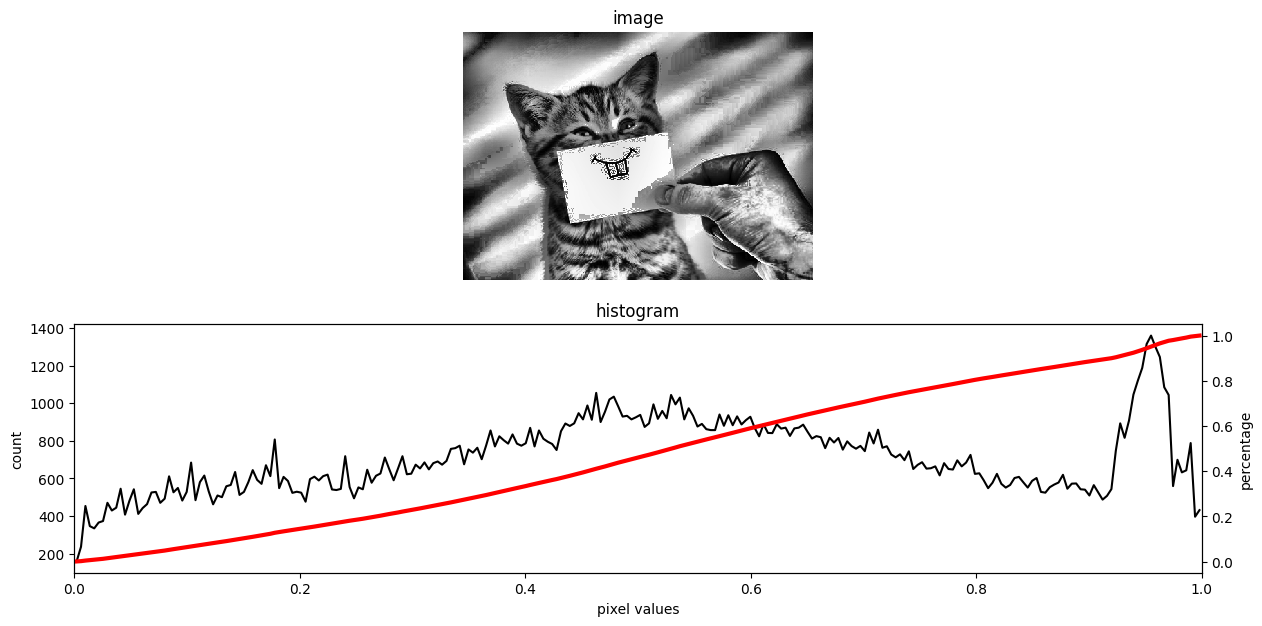

In [ ]:
I_AHE = exposure.equalize_adapthist(I, kernel_size=(64, 64), clip_limit=0)
plot_img_and_hist(I_AHE)

# CLAHE

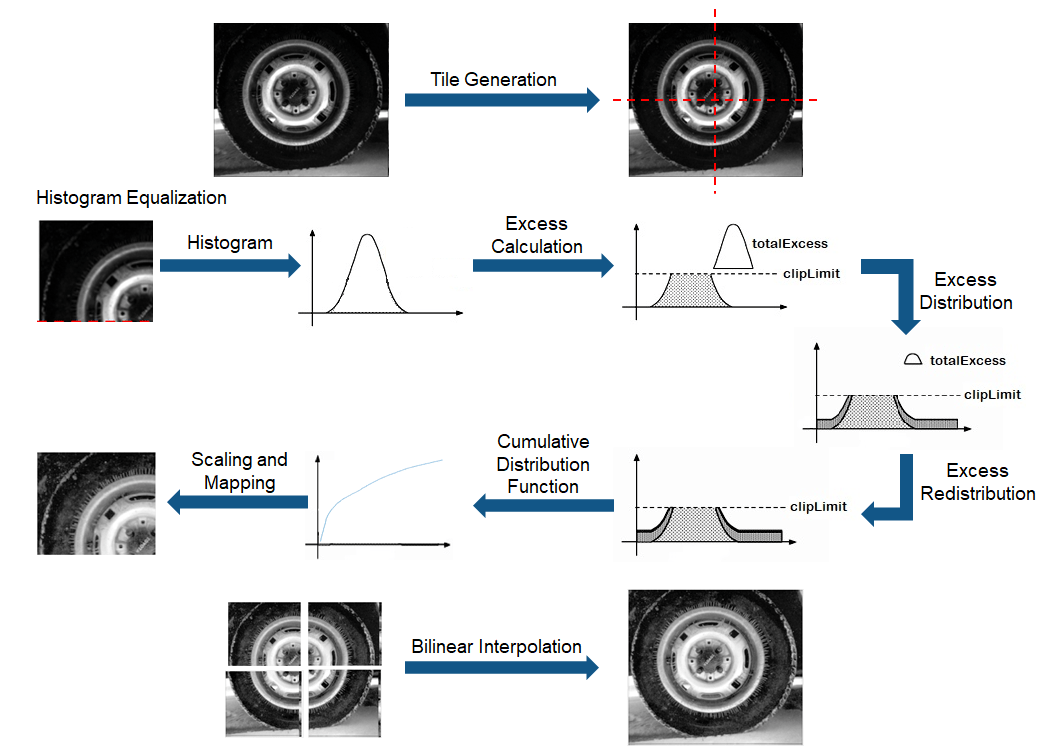

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


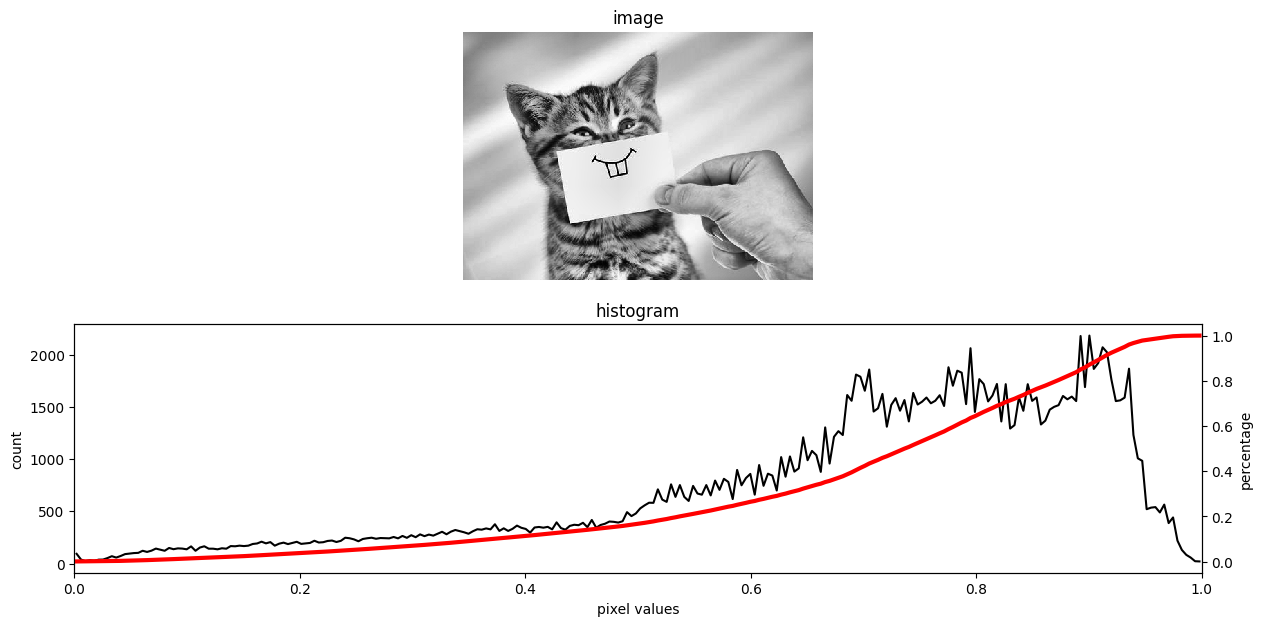

In [ ]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(64, 64), clip_limit=0.01)
plot_img_and_hist(I_CLAHE)

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


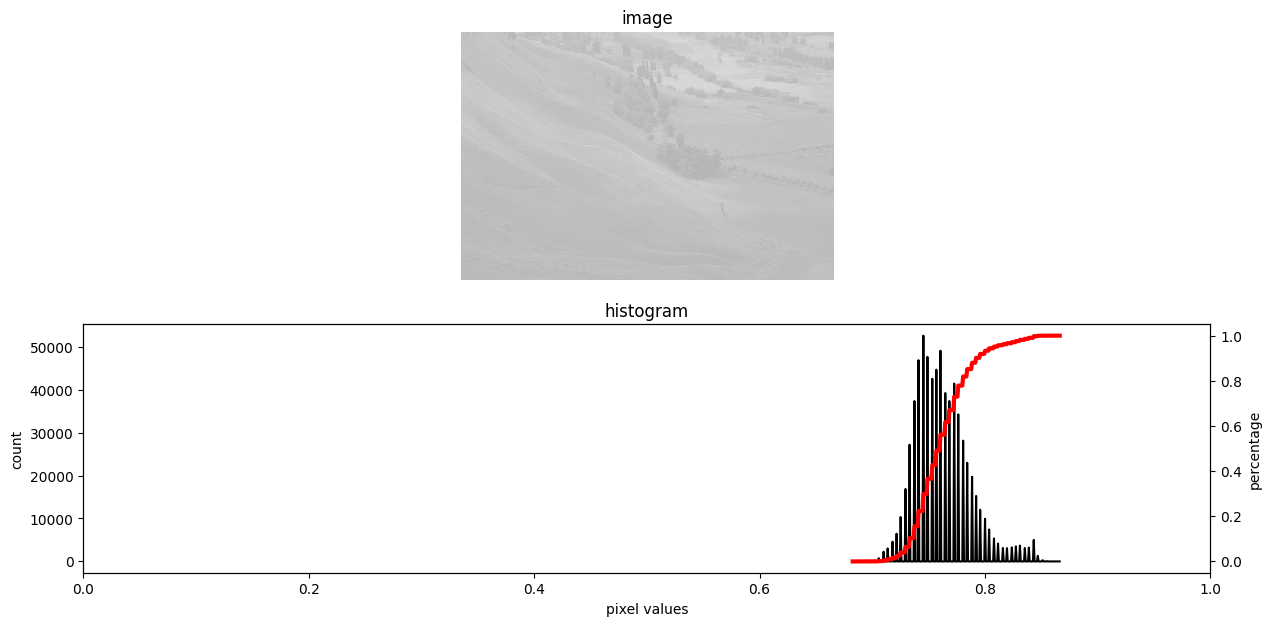

In [ ]:
I = io.imread("/content/sample_4.jpeg")
I = I/255
plot_img_and_hist(I)

/tmp/ipython-input-54-846078975.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


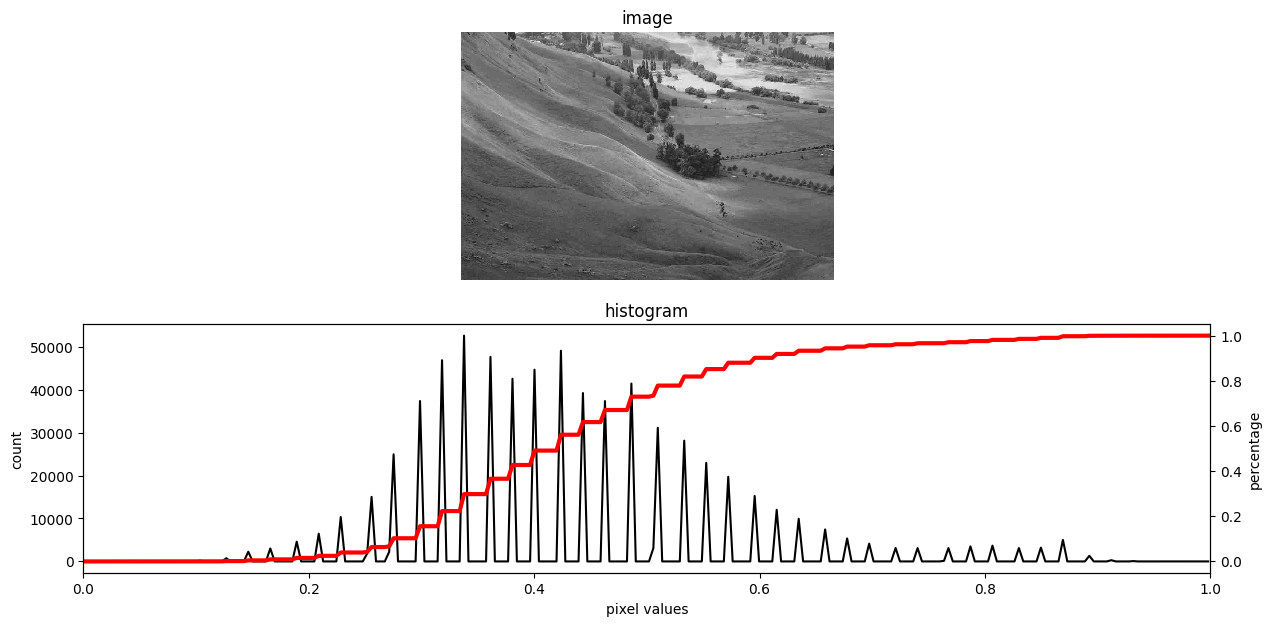

In [ ]:
I_CLAHE = exposure.equalize_adapthist(I, kernel_size=(36, 36), clip_limit=0.001)
plot_img_and_hist(I_CLAHE)

/tmp/ipython-input-121-665705668.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_CLAHE)


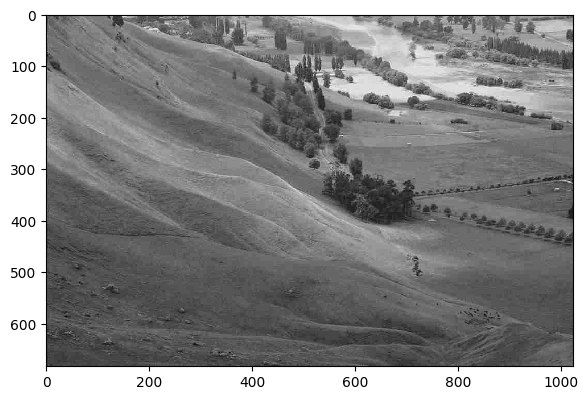

In [ ]:
io.imshow(I_CLAHE)